In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf;print(tf.__version__)

2.11.0


In [2]:
data = pd.read_csv("C:\\Users\\ritik\\Downloads\\survey.csv")
print(data.head())
df = data.copy()

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [3]:
data = data[["Age","Gender","family_history","benefits","care_options","anonymity","leave","work_interfere","treatment"]]

In [4]:
data.isna().sum()

Age                 0
Gender              0
family_history      0
benefits            0
care_options        0
anonymity           0
leave               0
work_interfere    264
treatment           0
dtype: int64

In [5]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [6]:
data['work_interfere'].mode()

0    Sometimes
dtype: object

In [7]:
data['work_interfere'] = data['work_interfere'].fillna('Sometimes')

In [8]:
data.head()

,Age,Gender,family_history,benefits,care_options,anonymity,leave,work_interfere,treatment
0,37,Female,No,Yes,Not sure,Yes,Somewhat easy,Often,Yes
1,44,M,No,Don't know,No,Don't know,Don't know,Rarely,No
2,32,Male,No,No,No,Don't know,Somewhat difficult,Rarely,No
3,31,Male,Yes,No,Yes,No,Somewhat difficult,Often,Yes
4,31,Male,No,Yes,No,Don't know,Don't know,Never,No


In [9]:
data.head()

,Age,Gender,family_history,benefits,care_options,anonymity,leave,work_interfere,treatment
0,37,Female,No,Yes,Not sure,Yes,Somewhat easy,Often,Yes
1,44,M,No,Don't know,No,Don't know,Don't know,Rarely,No
2,32,Male,No,No,No,Don't know,Somewhat difficult,Rarely,No
3,31,Male,Yes,No,Yes,No,Somewhat difficult,Often,Yes
4,31,Male,No,Yes,No,Don't know,Don't know,Never,No


In [10]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': 49,
 'family_history': 2,
 'benefits': 3,
 'care_options': 3,
 'anonymity': 3,
 'leave': 5,
 'work_interfere': 4,
 'treatment': 2}

In [11]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Female',
  'M',
  'Male',
  'male',
  'female',
  'm',
  'Male-ish',
  'maile',
  'Trans-female',
  'Cis Female',
  'F',
  'something kinda male?',
  'Cis Male',
  'Woman',
  'f',
  'Mal',
  'Male (CIS)',
  'queer/she/they',
  'non-binary',
  'Femake',
  'woman',
  'Make',
  'Nah',
  'All',
  'Enby',
  'fluid',
  'Genderqueer',
  'Female ',
  'Androgyne',
  'Agender',
  'cis-female/femme',
  'Guy (-ish) ^_^',
  'male leaning androgynous',
  'Male ',
  'Man',
  'Trans woman',
  'msle',
  'Neuter',
  'Female (trans)',
  'queer',
  'Female (cis)',
  'Mail',
  'cis male',
  'A little about you',
  'Malr',
  'p',
  'femail',
  'Cis Man',
  'ostensibly male, unsure what that really means'],
 'family_history': ['No', 'Yes'],
 'benefits': ['Yes', "Don't know", 'No'],
 'care_options': ['Not sure', 'No', 'Yes'],
 'anonymity': ['Yes', "Don't know", 'No'],
 'leave': ['Somewhat easy',
  "Don't know",
  'Somewhat difficult',
  'Very difficult',
  'Very easy'],
 'work_interfere': ['Often

In [12]:
def encode_gender(x):
    if x.lower()[0] == 'f':
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

In [13]:
data['Gender'] = data['Gender'].apply(encode_gender)

In [14]:
data.head()

,Age,Gender,family_history,benefits,care_options,anonymity,leave,work_interfere,treatment
0,37,0,No,Yes,Not sure,Yes,Somewhat easy,Often,Yes
1,44,1,No,Don't know,No,Don't know,Don't know,Rarely,No
2,32,1,No,No,No,Don't know,Somewhat difficult,Rarely,No
3,31,1,Yes,No,Yes,No,Somewhat difficult,Often,Yes
4,31,1,No,Yes,No,Don't know,Don't know,Never,No


In [15]:
target = 'treatment'

binary_features = [
    'family_history',
]

ordinal_features = [
    'work_interfere',
]

nominal_features = [
    'benefits',
    'care_options',
    'anonymity',
    'leave'
]

In [16]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [17]:
binary_positive_values = ['Yes' for feature in binary_features]

ordinal_orderings = [
    ['Never', 'Rarely', 'Sometimes', 'Often']
]

nominal_prefixes = [
    'be',
    'ca',
    'an',
    'le'
]

In [18]:
data = binary_encode(
    data,
    columns=binary_features,
    positive_values=binary_positive_values
)

data = ordinal_encode(
    data,
    columns=ordinal_features,
    orderings=ordinal_orderings
)

data = onehot_encode(
    data,
    columns=nominal_features,
    prefixes=nominal_prefixes
)

In [19]:
data.head()

,Age,Gender,family_history,work_interfere,treatment,be_Don't know,be_No,be_Yes,ca_No,ca_Not sure,ca_Yes,an_Don't know,an_No,an_Yes,le_Don't know,le_Somewhat difficult,le_Somewhat easy,le_Very difficult,le_Very easy
0,37,0,0,3,Yes,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,44,1,0,1,No,1,0,0,1,0,0,1,0,0,1,0,0,0,0
2,32,1,0,1,No,0,1,0,1,0,0,1,0,0,0,1,0,0,0
3,31,1,1,3,Yes,0,1,0,0,0,1,0,1,0,0,1,0,0,0
4,31,1,0,0,No,0,0,1,1,0,0,1,0,0,1,0,0,0,0


In [20]:
data = binary_encode(data, columns=['treatment'], positive_values=['Yes'])

In [21]:
print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))

Remaining non-numeric columns: 0


In [22]:
print("Remaining missing values:", data.isna().sum().sum())

Remaining missing values: 0


In [23]:
y = data['treatment'].copy()
X = data.drop('treatment', axis=1).copy()

In [24]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [26]:
X.shape

(1259, 18)

In [27]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 49.7% / 50.3%


In [28]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


batch_size = 64
epochs = 90

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/90
11/11 [==============================] - 1s 52ms/step - loss: 0.5852 - accuracy: 0.7017 - auc: 0.7668 - val_loss: 0.6831 - val_accuracy: 0.6384 - val_auc: 0.6975 - lr: 0.0010
Epoch 2/90
11/11 [==============================] - 0s 39ms/step - loss: 0.4966 - accuracy: 0.7543 - auc: 0.8382 - val_loss: 0.6485 - val_accuracy: 0.6610 - val_auc: 0.7147 - lr: 0.0010
Epoch 3/90
11/11 [==============================] - 0s 28ms/step - loss: 0.4740 - accuracy: 0.7628 - auc: 0.8547 - val_loss: 0.6604 - val_accuracy: 0.6497 - val_auc: 0.7130 - lr: 0.0010
Epoch 4/90
11/11 [==============================] - 0s 30ms/step - loss: 0.4589 - accuracy: 0.7841 - auc: 0.8641 - val_loss: 0.7099 - val_accuracy: 0.6441 - val_auc: 0.7115 - lr: 0.0010
Epoch 5/90
11/11 [==============================] - 0s 32ms/step - loss: 0.4454 - accuracy: 0.7884 - auc: 0.8727 - val_loss: 0.6548 - val_accuracy: 0.6441 - val_auc: 0.7232 - lr: 0.0010
Epoch 6/90
11/11 [==============================] - 0s 29ms/step - los

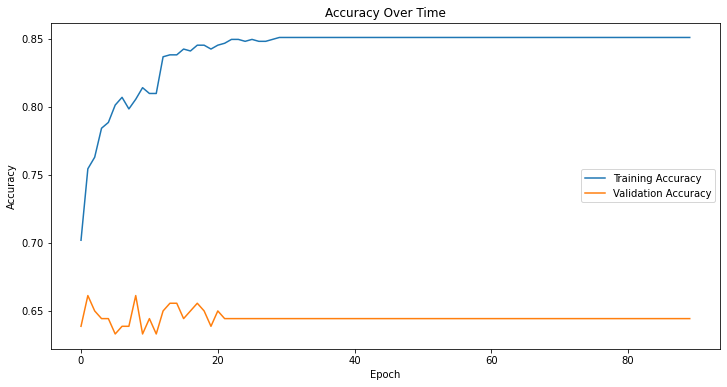

In [29]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Accuracy Over Time")

plt.show()

In [30]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 4ms/step - loss: 0.7263 - accuracy: 0.6984 - auc: 0.7608


[0.7263274192810059, 0.6984127163887024, 0.7607731819152832]

In [31]:
df = pd.DataFrame(X_test)

In [32]:
df.shape

(378, 18)

In [1]:
import pickle

In [37]:
filename = 'C:\\Users\\ritik\\Desktop\\model.pkl'
pickle.dump(history, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\input_layer
......vars
...metrics\auc
......vars
.........0
.........1
.........2
.........3
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-16 16:33:37         2397
metadata.json                                  2023-02-16 16:33:37           64
variables.h5                                   2023-02-16 16:33:37     12872184


In [43]:
import os
import pandas as pd 
import numpy as np 
import flask
import pickle
from flask import Flask, render_template, request
app=Flask()
@app.route('C:\\Users\\ritik\\Desktop\\model.pkl')
def index():
 return flask.render_template('index.html')
def ValuePredictor(to_predict_list):
 to_predict = np.array(to_predict_list).reshape(1,4)
 loaded_model = pickle.load(open('model.pkl','rb'))
 result = loaded_model.predict(to_predict)
 return result[0]
@app.route('/predict',methods = ['POST'])
def result():
 if request.method == 'POST':
     to_predict_list = request.form.to_dict()
     to_predict_list=list(to_predict_list.values())
     to_predict_list = list(map(float, to_predict_list))
     result = ValuePredictor(to_predict_list)
     prediction = str(result)
 return render_template('predict.html',prediction=prediction)
if _name_ == '_main_':
 app.run(debug=True)

AttributeError: 'Functional' object has no attribute 'startswith'